# Techniques de ensemble - Excercise Authism

Ricardo Vallejo

https://blog.paperspace.com/bagging-ensemble-methods/

https://compphysics.github.io/MachineLearning/doc/pub/week45/html/week45.html


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy.stats
import seaborn as sns

data = pd.read_csv("Autism-Adolescent-Data.csv")
pd.set_option('display.max_rows', None)
data.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,m,Hispanic,yes,yes,Austria,no,6,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,m,Black,no,no,Austria,no,2,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,f,?,no,no,AmericanSamoa,no,2,12-16 years,?,NO
3,0,1,1,1,1,1,0,1,1,0,...,f,White-European,no,no,United Kingdom,no,7,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,f,?,no,no,Albania,no,7,12-16 years,?,YES


# Categorical to numerique

In [78]:
data.apply(lambda x: x.astype(str).str.lower())  #To lower all dataframe
data.head(5)

data.replace("yes", 1, inplace=True)
data.replace("no", 0, inplace=True)
data['gender'].replace("m", 0, inplace=True)
data['gender'].replace("f", 1, inplace=True)
data.head(5)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,0,0,0,1,1,1,1,1,1,0,...,0,Hispanic,1,1,Austria,0,6,12-16 years,Parent,NO
1,0,0,0,0,0,0,0,0,1,1,...,0,Black,0,0,Austria,0,2,12-16 years,Relative,NO
2,0,0,0,0,0,0,0,0,1,1,...,1,?,0,0,AmericanSamoa,0,2,12-16 years,?,NO
3,0,1,1,1,1,1,0,1,1,0,...,1,White-European,0,0,United Kingdom,0,7,12-16 years,Self,YES
4,1,1,1,1,1,1,1,0,0,0,...,1,?,0,0,Albania,0,7,12-16 years,?,YES


# Selection predicteurs

In [79]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         104 non-null    int64 
 1   A2_Score         104 non-null    int64 
 2   A3_Score         104 non-null    int64 
 3   A4_Score         104 non-null    int64 
 4   A5_Score         104 non-null    int64 
 5   A6_Score         104 non-null    int64 
 6   A7_Score         104 non-null    int64 
 7   A8_Score         104 non-null    int64 
 8   A9_Score         104 non-null    int64 
 9   A10_Score        104 non-null    int64 
 10  age              104 non-null    int64 
 11  gender           104 non-null    int64 
 12  ethnicity        104 non-null    object
 13  jundice          104 non-null    int64 
 14  austim           104 non-null    int64 
 15  contry_of_res    104 non-null    object
 16  used_app_before  104 non-null    int64 
 17  result           104 non-null    in

In [80]:
labels = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 
          'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 
          'age_desc', 'relation', 'Class/ASD']

model_labels = ['A1_Score', 'A10_Score', 'gender', 'jundice', 'austim']


X = data[model_labels]
X.head(5)


,A1_Score,A10_Score,gender,jundice,austim
0,0,0,0,1,1
1,0,1,0,0,0
2,0,1,1,0,0
3,0,0,1,0,0
4,1,0,1,0,0


In [81]:
y = data['Class/ASD']

# Split Training and test data

In [82]:

# Split in traning and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.20, random_state=44)

print("X training set: ", X_train.shape)
print("X test set: ", X_test.shape)

print("y training set: ", y_train.shape)
print("y test set: ", y_test.shape)


X training set:  (83, 5)
X test set:  (21, 5)
y training set:  (83,)
y test set:  (21,)


# Desicion Tree basse on GINI

In [83]:
from sklearn import tree
desicionTree = tree.DecisionTreeClassifier(max_depth =4, criterion='gini', random_state=44, min_samples_leaf=2)
desicionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=44, splitter='best')

[Text(154.84500000000003, 391.392, 'A10_Score <= 0.5\ngini = 0.462\nsamples = 83\nvalue = [30, 53]'),
 Text(83.70000000000002, 304.416, 'jundice <= 0.5\ngini = 0.436\nsamples = 28\nvalue = [19, 9]'),
 Text(66.96000000000001, 217.44, 'gender <= 0.5\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(33.480000000000004, 130.464, 'A1_Score <= 0.5\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(16.740000000000002, 43.488, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(50.220000000000006, 43.488, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(100.44000000000001, 130.464, 'A1_Score <= 0.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(83.70000000000002, 43.488, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(117.18, 43.488, 'gini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(100.44000000000001, 217.44, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(225.99000000000004, 304.416, 'A1_Score <= 0.5\ngini = 0.32\nsamples = 55\nvalue = [11, 44]'),
 Text(184.14000000000001, 

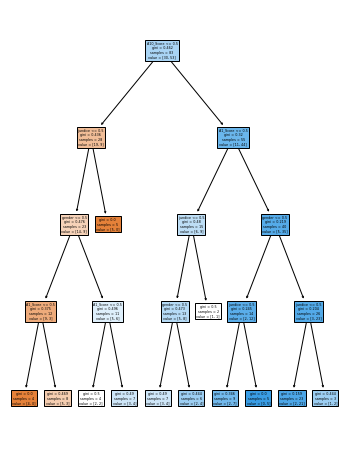

In [84]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize = (6,8))
plot_tree(desicionTree, feature_names = model_labels, filled = True)


# Make predictions decision Tree

In [85]:
#model_labels = ['A1_Score', 'A10_Score', 'gender', 'jundice', 'austim']

X_prediction = [[1,0,1,1,0]]
Y_prediction = desicionTree.predict(X_prediction)
print(Y_prediction)

['NO']


# Metriques

In [86]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

y_predicted_train = desicionTree.predict(X_train)
y_predicted_test = desicionTree.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_predicted_test, y_test))

Accuracy: 0.7142857142857143


In [87]:
print(confusion_matrix(y_test, y_predicted_test))

[[7 4]
 [2 8]]


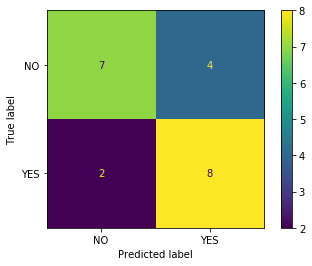

In [88]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(desicionTree, X_test, y_test)
plt.show()

# importances de variables dans le model.

In [89]:
desicionTree.feature_importances_ # Permet de avoir une indicateur de importance de variables dans le modele.

dfImportances = importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': desicionTree.feature_importances_ #desicionTree=model
})

dfImportances.sort_values(by='Importance', ascending=False)

,Attribute,Importance
1,A10_Score,0.609558
0,A1_Score,0.173994
3,jundice,0.139395
2,gender,0.077052
4,austim,0.000000


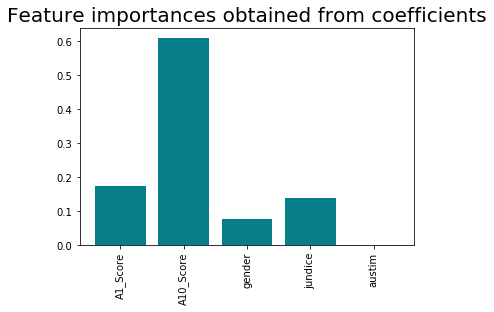

In [90]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()